<a href="https://colab.research.google.com/github/eemmy2547/229352/blob/main/lab04_naive_bayes_grid_and_random_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #4

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from scipy.stats import uniform

In [ ]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')

Xtrain = train.data[:3000]
ytrain = train.target[:3000]
Xtest = test.data[:500]
ytest = test.target[:500]

print("X:", len(Xtest))
print("y:", len(ytest))

X: 500
y: 500


### Naive Bayes [(Documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha = 0.1)

### Random Search Cross-Validation [(Documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

### Uniform distribution in `Scipy` [(Documentation)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

pipeline = Pipeline([('count', CountVectorizer(stop_words = 'english')),
                    ('nb', MultinomialNB())])


parameters = {'nb__alpha': uniform(loc=0.1, scale=10)}

clf = RandomizedSearchCV(pipeline, parameters, n_iter = 10, cv=3)
clf.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('count',
                                              CountVectorizer(stop_words='english')),
                                             ('nb', MultinomialNB())]),
                   param_distributions={'nb__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ae9f06550d0>})

In [ ]:
ypred = clf.predict(Xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.65      0.62      0.63        21
           1       0.88      0.33      0.48        21
           2       1.00      0.15      0.27        26
           3       0.51      0.82      0.63        34
           4       0.91      0.62      0.74        34
           5       0.55      0.85      0.67        26
           6       1.00      0.73      0.84        22
           7       0.82      0.96      0.89        28
           8       1.00      0.73      0.84        33
           9       0.91      0.80      0.85        25
          10       0.84      1.00      0.92        27
          11       0.50      1.00      0.67        20
          12       0.77      0.42      0.54        24
          13       0.83      0.83      0.83        23
          14       0.78      0.89      0.83        28
          15       0.69      0.93      0.79        29
          16       0.45      0.95      0.62        21
          17       0.78    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Exercise

1. For the Naive Bayes model, use grid search 5-fold cross-validation across different values of `alpha` to find the best model.

2. For the best value of `alpha`, compute the `f1_macro` score on the test set.
* What value of `alpha` did you obtain?
* What is the model's `f1_macro` score?

3. Repeat Exercise 1 and 2 for **random search** 5-fold cross validation across different values of `alpha`. Compute the `f1_macro` score on the test set.
* What value of `alpha` did you obtain?
* Did you get a better `f1_macro` score compared to grid search in Exercise 2?

grid search 5-fold cross-validation

In [ ]:
parameters = {'nb__alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

pipeline = Pipeline([
    ('count', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

gridcv = GridSearchCV(pipeline, parameters, scoring='f1_macro', cv=5)
gridcv.fit(Xtrain, ytrain)

best_model = gridcv.best_estimator_
ypred = best_model.predict(Xtest)

print("Best alpha from Grid Search:", gridcv.best_params_['nb__alpha'])
print(classification_report(ytest, ypred))

Best alpha from Grid Search: 0.01
              precision    recall  f1-score   support

           0       0.82      0.67      0.74        21
           1       0.48      0.48      0.48        21
           2       1.00      0.04      0.07        26
           3       0.54      0.65      0.59        34
           4       0.71      0.74      0.72        34
           5       0.69      0.69      0.69        26
           6       0.69      0.82      0.75        22
           7       0.85      1.00      0.92        28
           8       0.88      0.85      0.86        33
           9       0.96      0.88      0.92        25
          10       0.93      0.96      0.95        27
          11       0.75      0.90      0.82        20
          12       0.54      0.62      0.58        24
          13       0.78      0.78      0.78        23
          14       0.81      0.93      0.87        28
          15       0.79      0.90      0.84        29
          16       0.58      0.90      0.70    

random search 5-fold cross validation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

pipeline = Pipeline([('count', CountVectorizer(stop_words = 'english')),
                    ('nb', MultinomialNB())])


parameters = {'nb__alpha': uniform(loc=0.1, scale=10)}

clf = RandomizedSearchCV(pipeline, parameters, n_iter = 10, cv=5)
clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)

best_alpha = clf.best_params_['nb__alpha']

print('Best alpha from random search:', best_alpha)
print(classification_report(ytest, ypred))

Best alpha from random search: 0.5589387880994766
              precision    recall  f1-score   support

           0       0.64      0.67      0.65        21
           1       0.75      0.43      0.55        21
           2       1.00      0.04      0.07        26
           3       0.47      0.74      0.57        34
           4       0.87      0.79      0.83        34
           5       0.70      0.81      0.75        26
           6       0.89      0.77      0.83        22
           7       0.76      1.00      0.86        28
           8       0.96      0.79      0.87        33
           9       0.88      0.84      0.86        25
          10       0.87      1.00      0.93        27
          11       0.72      0.90      0.80        20
          12       0.64      0.67      0.65        24
          13       0.87      0.87      0.87        23
          14       0.81      0.93      0.87        28
          15       0.77      0.93      0.84        29
          16       0.53      0.

"ค่า alpha ที่ดีที่สุดจากการค้นหาแบบสุ่ม (random search) คือ 0.5589387880994766"

"ความแม่นยำ (accuracy) ที่ได้จากการค้นหาแบบสุ่มคือ 0.75 ซึ่งได้น้อยกว่าความแม่นยำที่ได้จากการค้นหาแบบกริด (grid search) ในแบบฝึกหัดที่ 2"
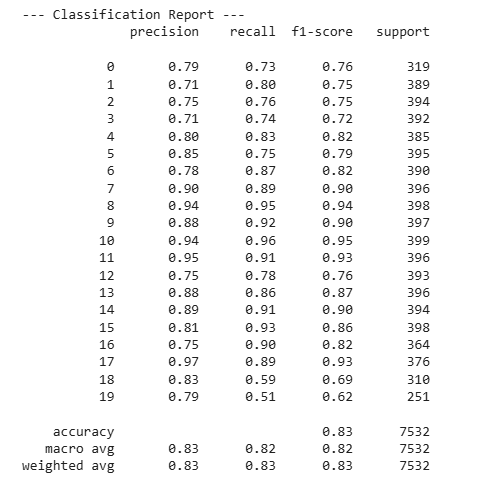